In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data = pd.read_csv('../data/raw/insurance.csv')

In [69]:
data = data.loc[data['smoker'] == 'yes']

In [70]:
data = data.drop(columns='smoker')
data = data.drop(columns='region')
data = data.drop(columns='children')
data = data.drop(columns='sex')

In [71]:
data.head()

,age,bmi,charges
0,19,27.90,16884.9240
11,62,26.29,27808.7251
14,27,42.13,39611.7577
19,30,35.30,36837.4670
23,34,31.92,37701.8768


In [72]:
from sklearn.preprocessing import LabelEncoder
# sex
# le = LabelEncoder()
# le.fit(data.sex.drop_duplicates()) 
# data.sex = le.transform(data.sex)

# region
# le.fit(data.region.drop_duplicates()) 
# data.region = le.transform(data.region)

# data = pd.concat([data, pd.get_dummies(data['region']).astype(int)], axis = 1)
# # data = data.drop(columns= 'northwest')
# data = data.drop(columns= 'region')

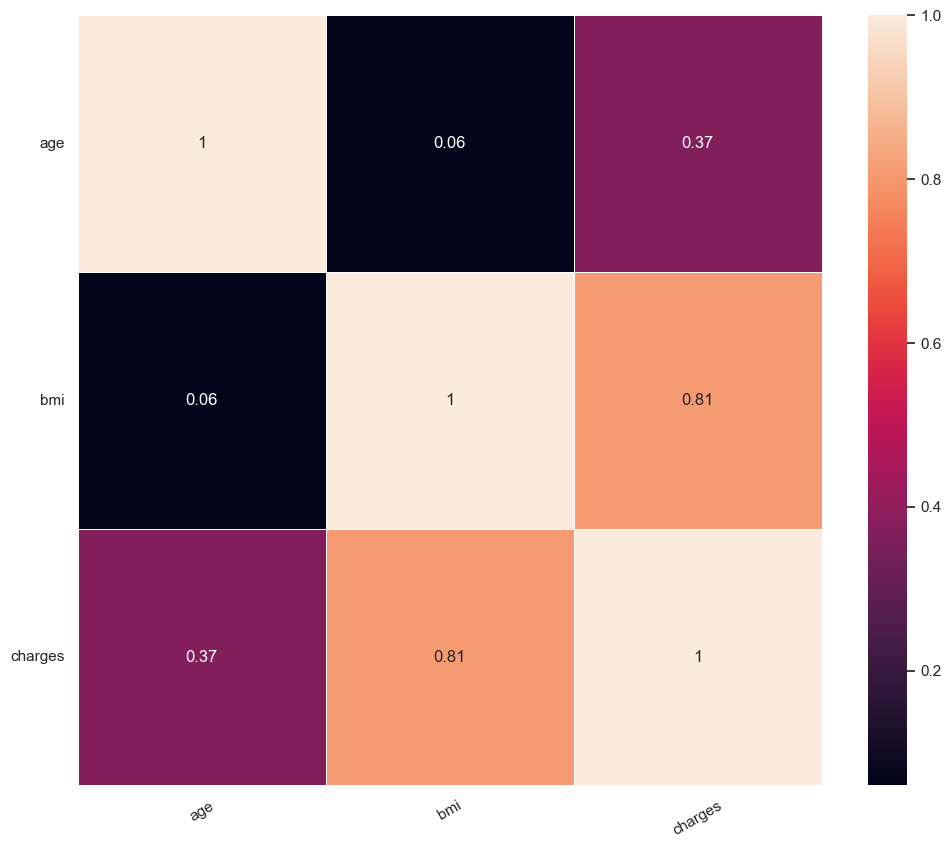

In [73]:
corr_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.4, ax=ax)
plt.yticks(rotation = 0);
plt.xticks(rotation = 30);

Text(0.5, 1.0, 'Distribution of Charges')

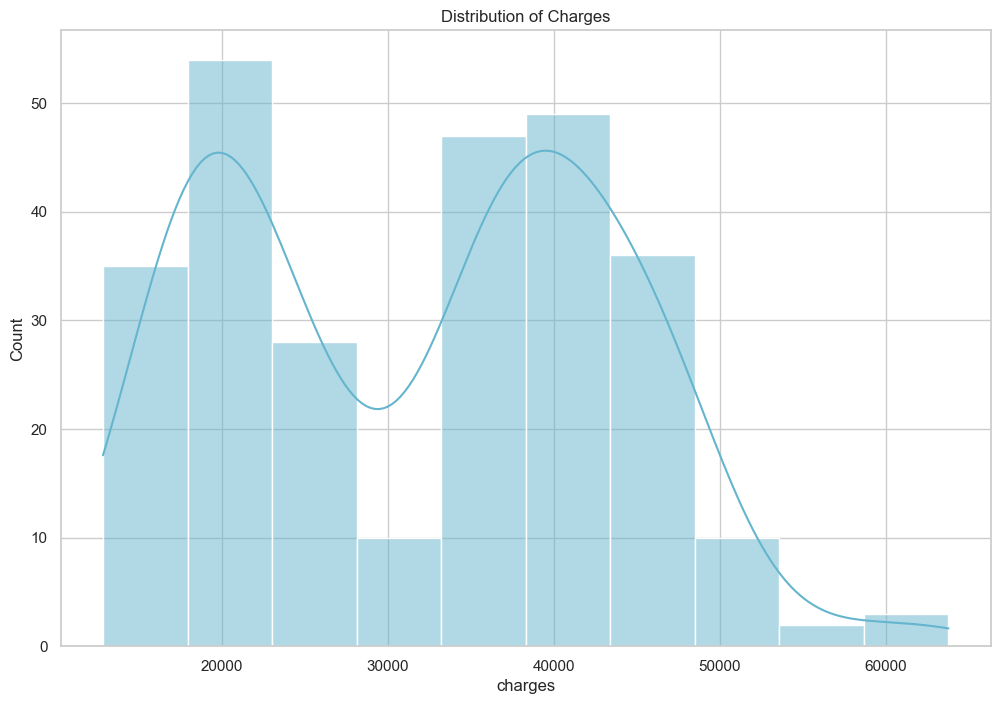

In [74]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

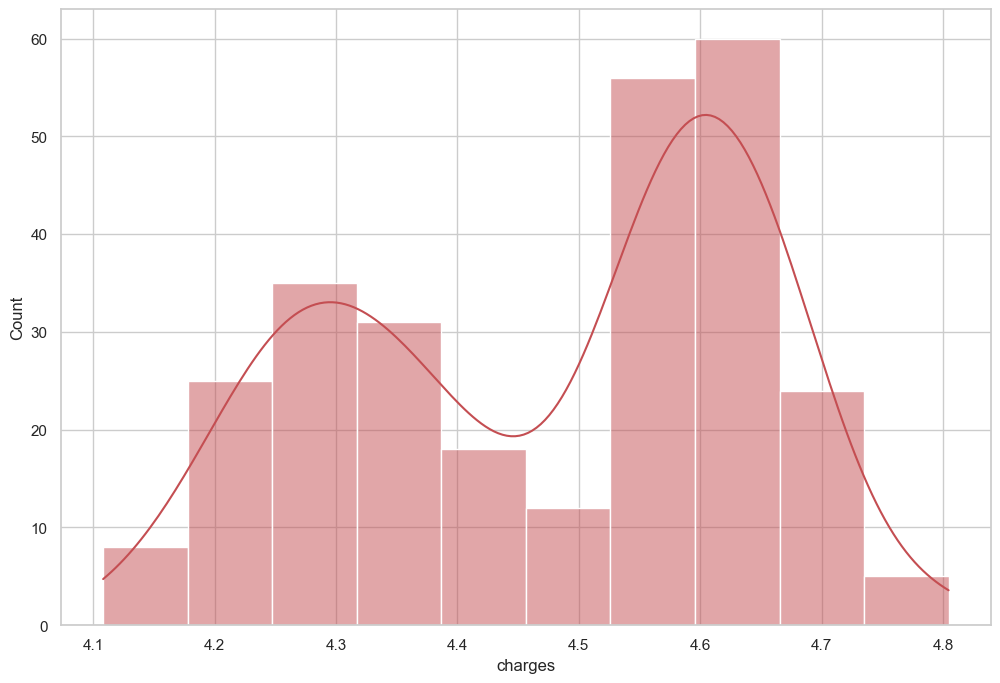

In [75]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(np.log10(data['charges']), kde = True, color = 'r')

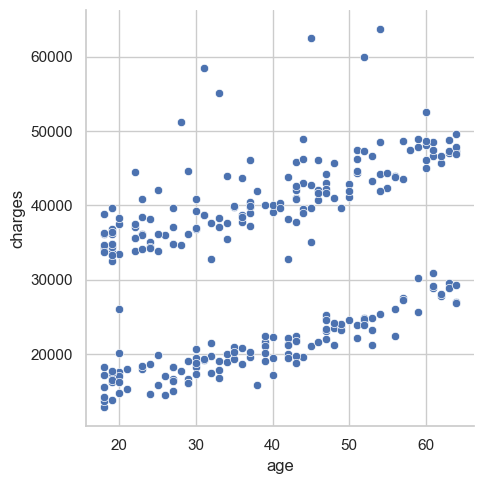

In [76]:
sns.relplot(x='age', y='charges', data=data)

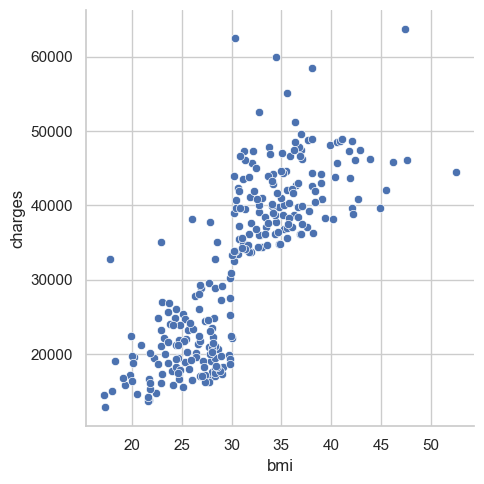

In [77]:
sns.relplot(x='bmi', y='charges', data=data)

Text(0.5, 1.0, 'Smokers and non-smokers')

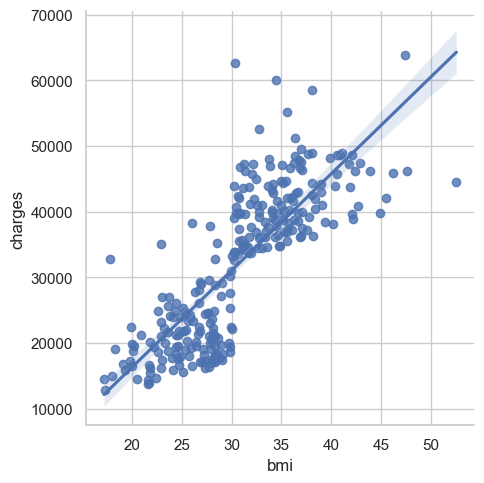

In [78]:
sns.lmplot(x="bmi", y="charges", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

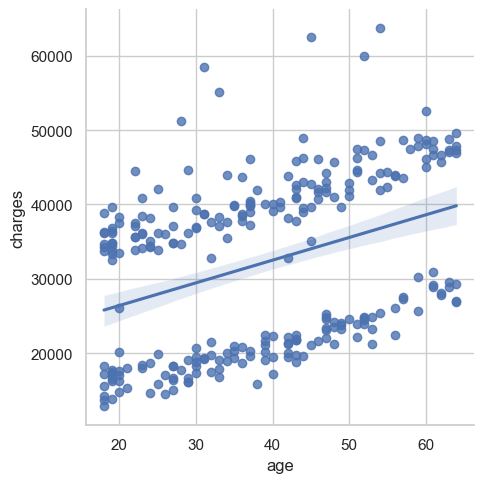

In [79]:
sns.lmplot(x="age", y="charges", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb

from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2


X = data.drop("charges", axis=1)
y = data["charges"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)
X_train.shape[0] / data.shape[0], X_test.shape[0] / data.shape[0]

(0.6970802919708029, 0.3029197080291971)

In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [None] + list(range(1, 60))
}

# Inicjalizacja Grid Search
model = LinearRegression()
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter = 100, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)

# Uruchomienie procesu wyszukiwania
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

# Wyświetlenie najlepszej dokładności
print("Najlepsza dokładność:", grid_search.best_score_)

# Użycie najlepszego modelu do przewidywania na danych testowych
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print("MAE Test: ", mae(y_test, y_pred_test).round(2))

Najlepsze parametry: {'n_jobs': 16, 'fit_intercept': True}
Najlepsza dokładność: -4518.064995314923
MAE Test:  4490.56


MAE Train:  4454.75
MAE Test:  4490.56
Różnica MAE:  -35.81
--------------------------------------------------
MSE Train:  34044061.31
MSE Test:  30450217.8
Różnica MSE:  3593843.51
--------------------------------------------------
MAPE Train:  0.15
MAPE Test:  0.17
Różnica MAPE:  -0.02
--------------------------------------------------
RMSE Train:  5834.73
RMSE Test:  5518.17
Różnica RMSE:  316.56
--------------------------------------------------
R2 Train:  0.75
R2 Test:  0.75
Różnica R2:  -0.01


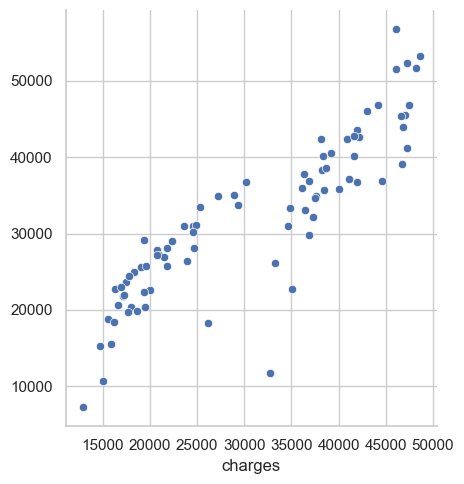

In [82]:
model = LinearRegression(n_jobs=8, fit_intercept= True)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MAE Train: ", mae(y_train, y_pred_train).round(2))
print("MAE Test: ", mae(y_test, y_pred_test).round(2))
print("Różnica MAE: ", round(mae(y_train, y_pred_train) - mae(y_test, y_pred_test),2))
print('-' * 50)
print("MSE Train: ", mse(y_train, y_pred_train).round(2))
print("MSE Test: ", mse(y_test, y_pred_test).round(2))
print("Różnica MSE: ", round(mse(y_train, y_pred_train) - mse(y_test, y_pred_test),2))
print('-' * 50)
print("MAPE Train: ", mape(y_train, y_pred_train).round(2))
print("MAPE Test: ", mape(y_test, y_pred_test).round(2))
print("Różnica MAPE: ", round(mape(y_train, y_pred_train) - mape(y_test, y_pred_test),2))
print('-' * 50)
print("RMSE Train: ", rmse(y_train, y_pred_train).round(2))
print("RMSE Test: ", rmse(y_test, y_pred_test).round(2))
print("Różnica RMSE: ", round(rmse(y_train, y_pred_train) - rmse(y_test, y_pred_test),2))
print('-' * 50)
print("R2 Train: ", r2(y_train, y_pred_train).round(2))
print("R2 Test: ", r2(y_test, y_pred_test).round(2))
print("Różnica R2: ", round(r2(y_train, y_pred_train) - r2(y_test, y_pred_test),2))

sns.relplot(x=y_test, y=y_pred_test)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      274 non-null    int64  
 1   bmi      274 non-null    float64
 2   charges  274 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.6 KB
